In [ ]:
! pip -q install optax

     |████████████████████████████████| 140 kB 5.1 MB/s 
     |████████████████████████████████| 72 kB 753 kB/s 


In [ ]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random

%config InlineBackend.figure_format='retina'

In [ ]:
! git init .
! git remote add origin https://github.com/VLSF/SNO
! git pull origin main

In [ ]:
from datasets import Indefinite_Integrals
from functions import utils

Indefinite integrals for 1D benchmarks

In [ ]:
N_points = 50

data = Indefinite_Integrals.Fourier_series(5, N_points, 5, key=random.PRNGKey(13), periodic=True, return_coefficients=False)
x = utils.grid(N_points, periodic=True)

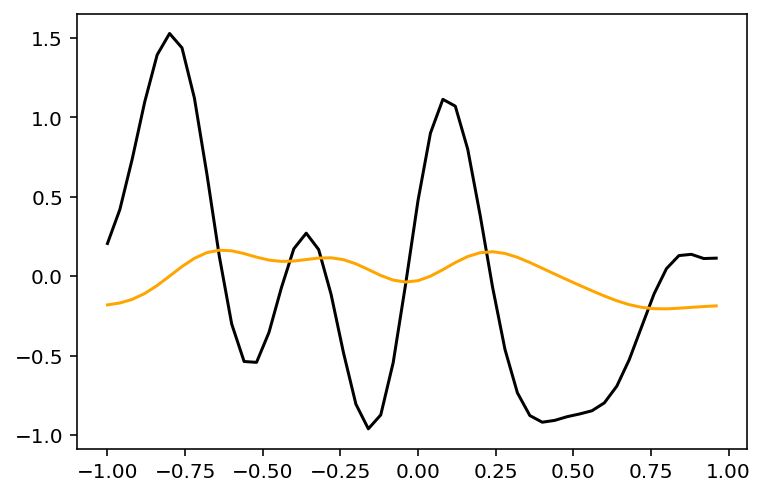

In [ ]:
plt.plot(x, data[0][0], color="black")
plt.plot(x, data[1][0], color="orange");

$L_2$ norm $=1$

In [ ]:
jnp.linalg.norm(data[0][0])*(x[1] - x[0])**(1/2)

DeviceArray(1., dtype=float64)

Numerical check that we perform integration

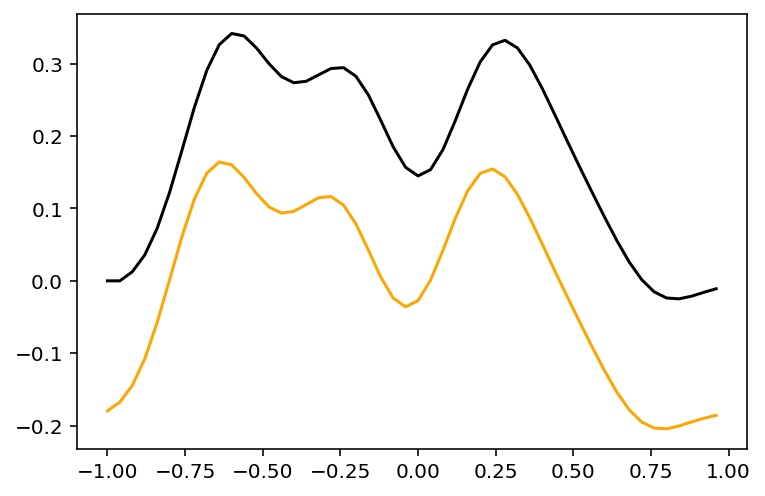

In [ ]:
int_f = [jnp.trapz(data[0][0][:i], x[:i]) for i in range(N_points)]

plt.plot(x, int_f, color="black")
plt.plot(x, data[1][0], color="orange");

Can also evaluate the same function on the Chebyshev grid

In [ ]:
N_points = 50

data = Indefinite_Integrals.Fourier_series(10, N_points, 5, key=random.PRNGKey(13), periodic=False, shift=20, return_coefficients=False)
x = utils.grid(N_points, periodic=False)

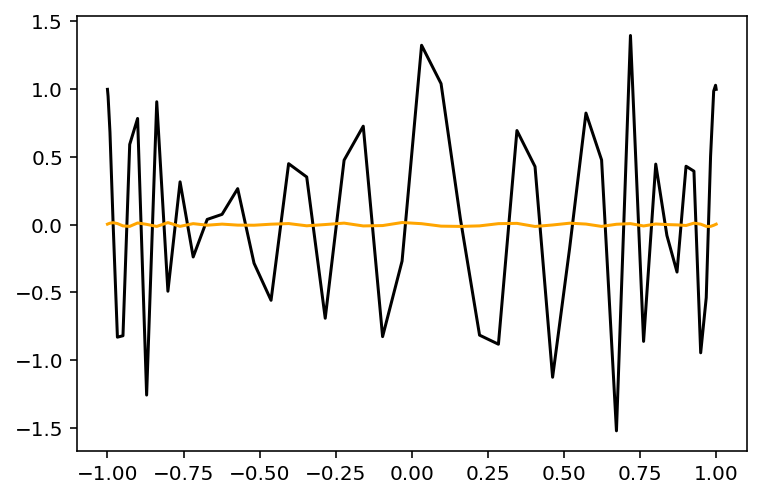

In [ ]:
plt.plot(x, data[0][0], color="black")
plt.plot(x, data[1][0], color="orange");

And in the space of coefficients.

In [ ]:
N_points = 100

data = Indefinite_Integrals.Fourier_series(10, N_points, 5, key=random.PRNGKey(13), shift=15, periodic=False, return_coefficients=True)

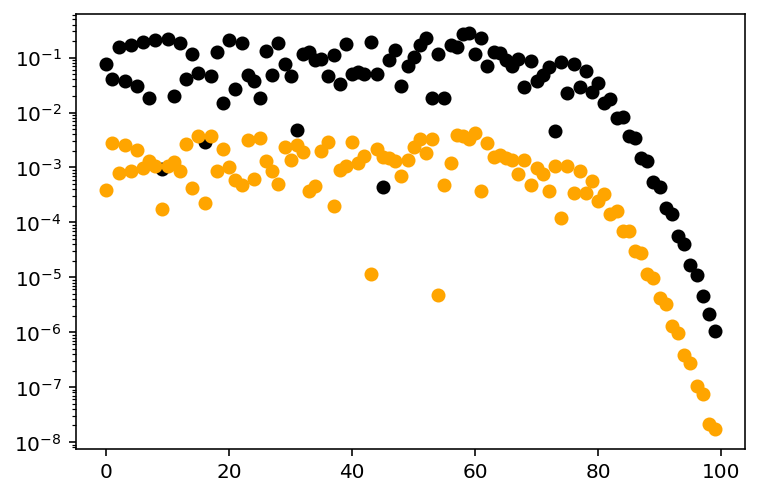

In [ ]:
plt.yscale("log")
plt.plot(abs(data[0][0]), "o", color="black")
plt.plot(abs(data[1][0]), "o", color="orange");

In [ ]:
N_points = 100

data = Indefinite_Integrals.Fourier_series(10, N_points, 5, key=random.PRNGKey(13), shift=20, periodic=True, return_coefficients=True)

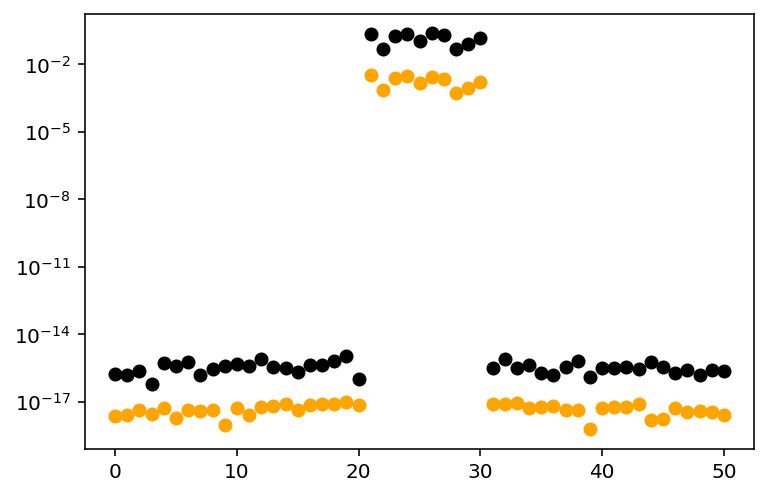

In [ ]:
plt.yscale("log")
plt.plot(abs(data[0][0]), "o", color="black")
plt.plot(abs(data[1][0]), "o", color="orange");